## Hands_On Machine Learning with Scikit-Learn, Keras & TensorFlow

### 2장 머신러닝 프로젝트 처음부터 끝까지

In [1]:
import pandas as pd
import numpy as np

<데이터 로드>

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# 데이터셋 정보 확인

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# 결측치 확인

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
obj = housing.select_dtypes(include='object').columns
num = housing.select_dtypes(include='number').columns

print(obj)
print(num)


display(housing[obj].head(3))
display(housing[num].head(3))

Index(['ocean_proximity'], dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


In [9]:
# 범주형 컬럼 attribute 확인

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# 수치형 변수 요약

housing[num].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


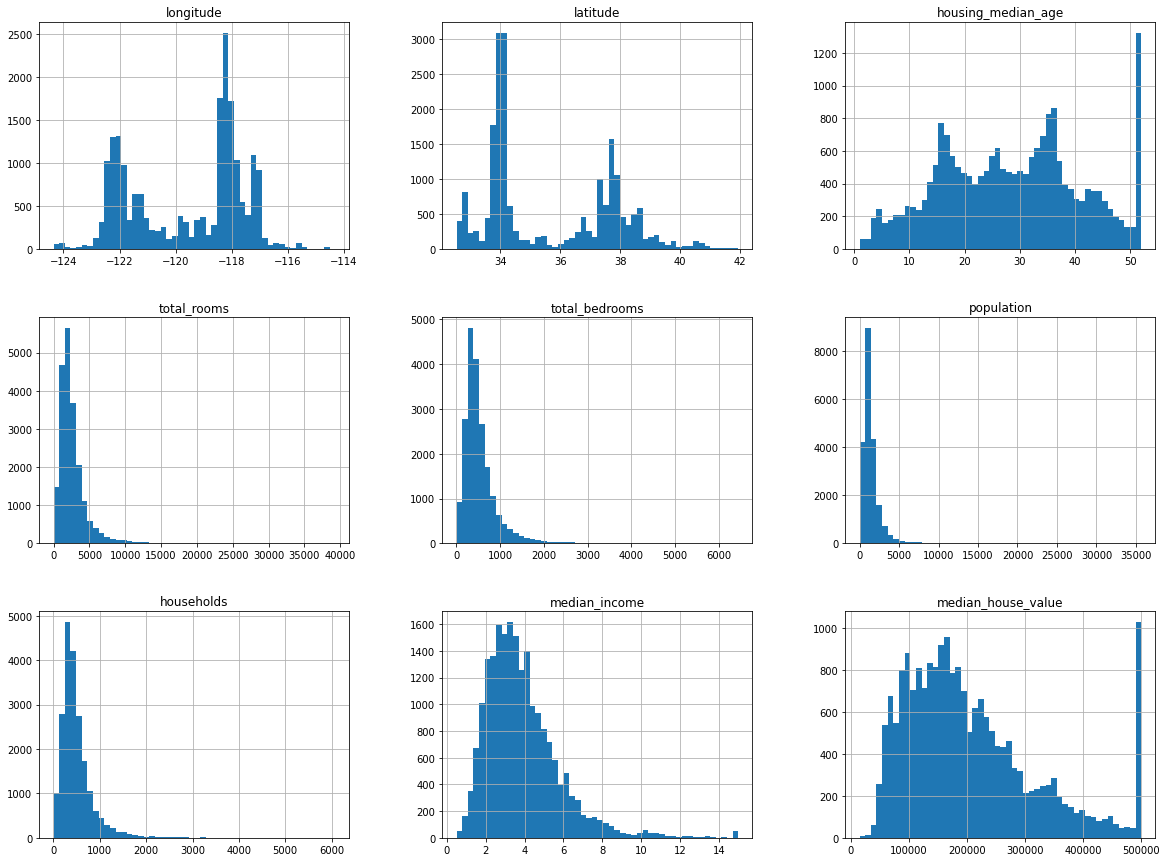

In [11]:
# 수치형 변수 히스토그램


%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15));

- 데이터 스누핑(data snooping) 편향을 막기 위한 테스트 세트 만들기

데이터 스누핑(data snooping) : 테스트 세트에서 드러난 패턴에 속아 특정 머신러닝 모델을 선택하게 되어, 일반화 오차를 추정해 낙관적인 추정이 되지만 실제 시스템에서는 기대한 성능이 나오지 않을 수 있음

### `permutation` vs `shuffle`

- **`permutation`** : array를 복사해서 shuffle -> inter를 np.arange(int)를 셔플한 것의 결과값을 return함
- **`shuffle`** : array를 셔플해서 inplace함 -> array 자체가 변함

In [12]:
a = [1,2,3,4,5]
b = np.random.permutation(a)
c = [1,2,3,4,5]
np.random.shuffle(c)

In [13]:
print(a) # a라는 array가 변하지 않음
print(b) # b라는 shuffle된 array 생성
print(c) # c라는 자체가 shuffle 되어 변함

[1, 2, 3, 4, 5]
[1 5 3 4 2]
[3, 4, 5, 1, 2]


In [14]:
a = 5
print(np.random.permutation(a))
print(np.arange(a))

[2 3 4 0 1]
[0 1 2 3 4]


## test set split

In [15]:
def split_train_test(data, test_ratio):
  shuffeld_indics = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffeld_indics[:test_set_size]
  train_indices = shuffeld_indics[test_set_size:]

  return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(housing, 0.2)
display(train_set.head(3))
print(len(train_set))
display(test_set.head(3))
print(len(test_set))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1351,-121.94,38.03,27.0,1654.0,478.0,1141.0,420.0,1.4871,87100.0,INLAND
10603,-117.81,33.67,9.0,1567.0,299.0,675.0,294.0,5.2124,199600.0,<1H OCEAN
13892,-116.27,34.13,37.0,452.0,109.0,184.0,59.0,3.7292,65800.0,INLAND


16512


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15768,-122.44,37.77,52.0,2537.0,559.0,849.0,530.0,5.1788,476900.0,NEAR BAY
2571,-124.15,40.76,24.0,2858.0,511.0,1388.0,512.0,3.3750,100600.0,NEAR OCEAN
1750,-122.32,37.95,35.0,1612.0,354.0,887.0,331.0,2.5769,146100.0,NEAR BAY


4128


In [16]:
from zlib import crc32


def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xfffffff < test_ratio * 2 **32


def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda x: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing_idx = housing.reset_index()

display(housing_idx.head(3))

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


- 행 인덱스를 고유 식별자로 사용 할 때는 위와 같이 인덱스를 생성하지만,
불가능할 경우에는 안전한 특성을 사용함 

In [18]:
# train_set,test_set = split_train_test_by_id(housing_idx, 0.2, 'index')

- 해당 데이터에서 중간 소득이 중간 주택 가격을 예측하는데 매우 중요하다는 도메인 지식을 가지고 있을 때, 테스트 세트는 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 함.

- 중간소득이 연속적인 숫자형 이므로 소득에 대한 카테고리 특성을 만듦

In [19]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

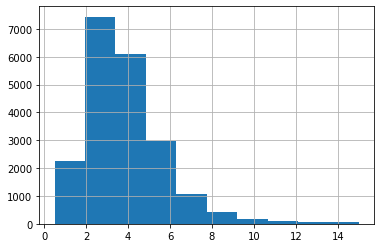

In [20]:
housing['median_income'].hist();

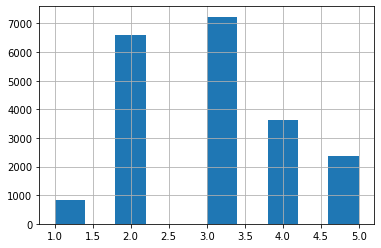

In [21]:
housing['income_cat'] = pd.cut(housing['median_income'],
       bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
       labels=[1,2,3,4,5])

housing['income_cat'].hist();


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_idx]
  strat_test_set = housing.loc[test_idx]

- 테스트 set 에서 소득 카테고리의 비

In [23]:
# strat_test_set['income_cat'].value_counts()/len(strate_test_set)

In [24]:
# for set_ in (strat_train_set, strat_test_set):
  # set_.drop('income_cat', axis=1, inplace=True)

## 훈련 데이터에만 EDA 실시

In [25]:
df = strat_train_set.copy()

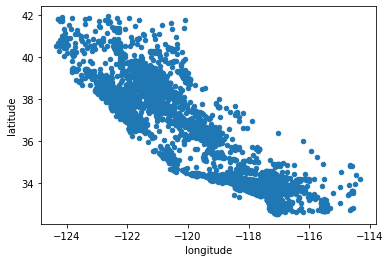

In [26]:
# 지리적 데이터 시각화

df.plot(kind='scatter', x='longitude', y='latitude');

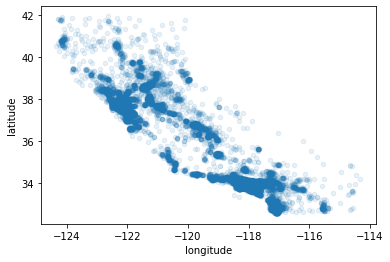

In [27]:
# alpha optioni으로 포인트가 밀집한 영역 보여줌 
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

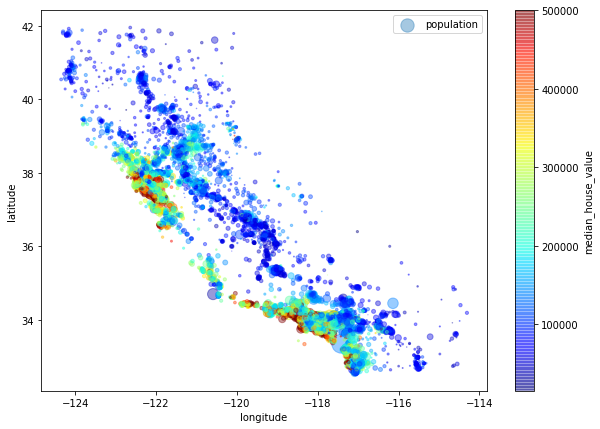

In [28]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='population', figsize=(10,7),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
        sharex=False);

- 빨간색은 높은 가격, 파란색은 낮은 가격, 큰 원은 인구가 밀집된 지역

### 상관관계 조사

- 표준 상관계수(피어슨)

In [29]:
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- median_house_value(중간 주택 가격)은 median_incom(중간 소득)이 올라갈때 증가하는 경향이 있음

- latitude(위도)와 median_house_value(중간 주택 가격)은 약한 음의 상관 관계, 북쪼거으로 갈수록 주택 가격이 조금씩 내려가는 경향을 보임 

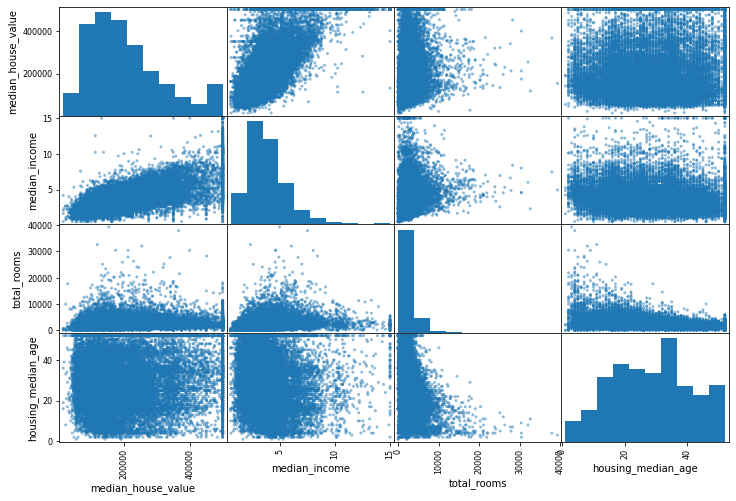

In [31]:
# 중간 주택 가격과 상관관계가 높아보이는 특성 몇 개만 산점도 그려보기

from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income', 'total_rooms','housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8));

### 특성 조합으로 실험

In [32]:
# 특정 구역의 방 개수는 얼마나 많은 가구 수가 있는지 모른다면 유용하지 않아서, 가구 당 방의 개수가 필요함
# 전체 침실의 개수도 자체는 유용하지 않아 방 개수와 비교하는 것이 나음

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [33]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## ML을 위한 데이터 준비

In [34]:
df = strat_train_set.drop(columns='median_house_value', axis=1)
target = strat_train_set['median_house_value'].copy()

In [35]:
display(df.head(3))
display(target.head(3))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2


12655     72100.0
15502    279600.0
2908      82700.0
Name: median_house_value, dtype: float64

In [36]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

In [37]:
#위의 total_bedrooms의 누락값 대체

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [38]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  3.0000e+00])

In [40]:
housing_num.median().values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [41]:
X = imputer.transform(housing_num)
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  8.3252e+00,
         4.5260e+05,  5.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  8.3014e+00,
         3.5850e+05,  5.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  7.2574e+00,
         3.5210e+05,  5.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.7000e+00,
         9.2300e+04,  2.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  1.8672e+00,
         8.4700e+04,  2.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  2.3886e+00,
         8.9400e+04,  2.0000e+00]])

In [42]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
display(housing_tr.head(3))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
